# Text-to-Image Generation with Diffusion Models

## Abstract

This notebook explores the fascinating world of text-to-image generation using diffusion models, a cutting-edge approach in generative AI. We'll delve into the fundamental concepts behind diffusion models, their architecture, and how they transform textual descriptions into visually coherent images. Readers will gain insights into the step-by-step diffusion process, the role of conditioning mechanisms, and the mathematical foundations that enable these models to produce high-quality, creative visuals. Through practical code examples, we'll demonstrate how to implement key components of diffusion models, generate images from text prompts, and evaluate the results. We'll also compare diffusion models with other generative approaches like GANs and VAEs, highlighting the unique advantages that have made diffusion models the state-of-the-art in text-to-image synthesis tasks. By the end of this notebook, readers will have a comprehensive understanding of both the theoretical principles and practical applications of diffusion-based text-to-image generation.

## 1. Theory Section: Foundations of Diffusion Models for Text-to-Image Generation

### 1.1 Introduction to Generative Models

Generative models are a class of machine learning algorithms designed to learn the underlying distribution of training data and generate new samples that resemble this distribution. In the context of images, generative models learn to produce new images that look similar to those in the training dataset.

Over the years, several generative model architectures have emerged:

#### 1.1.1 Key Types of Generative Models

1. **Generative Adversarial Networks (GANs)**
   - Consist of two neural networks (generator and discriminator) trained adversarially
   - Generator creates images, discriminator evaluates their authenticity
   - Notable for sharp image quality but often struggle with training stability

2. **Variational Autoencoders (VAEs)**
   - Encode images into a probability distribution in latent space
   - Decode samples from this distribution to generate new images
   - More stable training than GANs but often produce blurrier results

3. **Autoregressive Models**
   - Generate images pixel by pixel, treating image generation as a sequence prediction task
   - Examples include PixelRNN and PixelCNN
   - Can capture fine details but generation is computationally expensive

4. **Flow-based Models**
   - Use invertible transformations to map between simple distributions and complex data distributions
   - Allow exact likelihood computation but often require complex architectures

5. **Diffusion Models**
   - Gradually add noise to data and then learn to reverse this process
   - Currently achieve state-of-the-art results in image generation tasks
   - Offer a good balance of quality, diversity, and training stability

### 1.2 The Diffusion Process: A Detailed Look

Diffusion models, introduced by Sohl-Dickstein et al. in 2015 and popularized by Ho et al. in 2020 with Denoising Diffusion Probabilistic Models (DDPM), take a fundamentally different approach to generation.

#### 1.2.1 Forward Process (Diffusion)

The forward diffusion process gradually adds Gaussian noise to an image over multiple timesteps, eventually transforming it into pure noise:

1. Start with a real image $x_0$
2. At each timestep $t$, add a small amount of noise to get $x_t$
3. After T timesteps, the image becomes essentially random noise $x_T$

Mathematically, this process can be described as:

$$q(x_t|x_{t-1}) = \mathcal{N}(x_t; \sqrt{1-\beta_t}x_{t-1}, \beta_t\mathbf{I})$$

Where:
- $\beta_t$ is the noise schedule that controls how much noise is added at each step
- $\mathcal{N}$ represents a normal distribution

A key insight is that we can sample $x_t$ directly from $x_0$ using the formula:

$$x_t = \sqrt{\bar{\alpha}_t}x_0 + \sqrt{1-\bar{\alpha}_t}\epsilon$$

Where:
- $\alpha_t = 1 - \beta_t$
- $\bar{\alpha}_t = \prod_{i=1}^{t}\alpha_i$
- $\epsilon \sim \mathcal{N}(0, \mathbf{I})$

#### 1.2.2 Reverse Process (Denoising)

The real magic happens in the reverse process, where we learn to gradually denoise a random sample to produce a coherent image:

1. Start with random noise $x_T \sim \mathcal{N}(0, \mathbf{I})$
2. Iteratively predict and remove noise for each timestep $t = T, T-1, ..., 1$
3. End with a clean image $x_0$

The reverse process is modeled as:

$$p_\theta(x_{t-1}|x_t) = \mathcal{N}(x_{t-1}; \mu_\theta(x_t, t), \Sigma_\theta(x_t, t))$$

Where:
- $\mu_\theta$ is the predicted mean, parameterized by a neural network
- $\Sigma_\theta$ is the predicted variance, often set to a fixed schedule

In practice, instead of directly predicting $x_{t-1}$, the network is trained to predict the noise $\epsilon$ that was added, using the objective:

$$L = \mathbb{E}_{t,x_0,\epsilon}[||\epsilon - \epsilon_\theta(x_t, t)||^2]$$

### 1.3 Conditioning Mechanisms for Text-to-Image Generation

To generate images from text descriptions, diffusion models incorporate conditioning mechanisms that guide the denoising process based on textual input.

#### 1.3.1 Classifier Guidance

Early approaches used classifier guidance, where a pretrained classifier steers the generation process toward images that match the text description:

$$\nabla_{x_t} \log p(y|x_t)$$

Where $y$ is the text description and $p(y|x_t)$ is the probability of the description given the current noisy image.

#### 1.3.2 Classifier-Free Guidance

More recent models like DALL-E 2 and Stable Diffusion use classifier-free guidance, which doesn't require a separate classifier:

$$\hat{\epsilon}_\theta(x_t, y) = \epsilon_\theta(x_t) + s \cdot (\epsilon_\theta(x_t, y) - \epsilon_\theta(x_t))$$

Where:
- $\epsilon_\theta(x_t)$ is the unconditional noise prediction
- $\epsilon_\theta(x_t, y)$ is the conditional noise prediction
- $s$ is the guidance scale that controls how strongly the text influences the generation

#### 1.3.3 Cross-Attention Mechanism

The most effective way to incorporate text conditions uses cross-attention layers within the U-Net architecture:

$$\text{Attention}(Q, K, V) = \text{softmax}\left(\frac{QK^T}{\sqrt{d}}\right)V$$

Where:
- $Q$ (queries) come from the image features
- $K, V$ (keys and values) come from the text embeddings
- This allows text features to directly influence the denoising process

### 1.4 Latent Diffusion Models

Most modern text-to-image systems use latent diffusion models (LDMs), which operate in a compressed latent space rather than pixel space:

1. A VAE encoder compresses images to a lower-dimensional latent representation
2. The diffusion process operates in this latent space, which is computationally efficient
3. A VAE decoder converts the generated latent representation back to pixel space

This approach, exemplified by Stable Diffusion, dramatically reduces computational requirements while maintaining generation quality.

### 1.5 Comparison with Other Generative Approaches

| Feature | Diffusion Models | GANs | VAEs | Transformers |
|---------|------------------|------|------|-------------|
| Image Quality | High | High | Medium | Medium-High |
| Training Stability | High | Low | High | Medium |
| Sampling Speed | Slow (multiple steps) | Fast (single pass) | Fast (single pass) | Slow (autoregressive) |
| Mode Coverage | High | Often low (mode collapse) | High | High |
| Conditioning Flexibility | High | Medium | Medium | High |
| Interpretability | High (progressive denoising) | Low (black box) | Medium (latent space) | Medium (attention maps) |

Diffusion models have gained prominence for text-to-image generation because they offer:
- Better sample quality than VAEs
- More stable training than GANs
- Better mode coverage (diversity of generated images)
- Natural incorporation of conditioning information

## 2. Practical Code Examples: Implementing Text-to-Image Diffusion Models

Now let's implement key components of text-to-image diffusion models and demonstrate their capabilities with practical code examples.

### 2.1 Setting Up the Environment


In [2]:
# Core dependencies
import numpy as np
import torch
import matplotlib.pyplot as plt
from tqdm import tqdm
import time

# Diffusers and related libraries
from diffusers import StableDiffusionPipeline, DDPMScheduler, UNet2DConditionModel
from transformers import CLIPTextModel, CLIPTokenizer

In [3]:
!pip install --quiet numpy==1.25.2
# After installing, restart the runtime again

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 75.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.25.2 which is incompatible.
blosc2 3.3.0 requires numpy>=1.26, but you have numpy 1.25.2 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.25.2 which is incompatible.


In [4]:
import numpy as np
print("'dtypes' in numpy attributes:", 'dtypes' in dir(np))

'dtypes' in numpy attributes: True


In [5]:
class SimpleDiffusion:
    def __init__(self, timesteps=1000, img_size=32, beta_start=1e-4, beta_end=0.02):
        """
        Initialize a simple diffusion model.

        Args:
            timesteps: Number of diffusion steps
            img_size: Size of images (assumed square)
            beta_start: Starting noise schedule value
            beta_end: Ending noise schedule value
        """
        self.timesteps = timesteps
        self.img_size = img_size

        # Define noise schedule
        self.betas = torch.linspace(beta_start, beta_end, timesteps)
        self.alphas = 1. - self.betas
        self.alphas_cumprod = torch.cumprod(self.alphas, dim=0)
        self.sqrt_alphas_cumprod = torch.sqrt(self.alphas_cumprod)
        self.sqrt_one_minus_alphas_cumprod = torch.sqrt(1. - self.alphas_cumprod)

        # For the reverse process
        self.posterior_variance = self.betas * (1. - self.alphas_cumprod.roll(1)) / (1. - self.alphas_cumprod)
        self.posterior_variance[0] = self.betas[0]
        self.posterior_log_variance = torch.log(self.posterior_variance)
        self.posterior_mean_coef1 = torch.sqrt(self.alphas) * (1. - self.alphas_cumprod.roll(1)) / (1. - self.alphas_cumprod)
        self.posterior_mean_coef2 = torch.sqrt(self.alphas_cumprod.roll(1)) * self.betas / (1. - self.alphas_cumprod)
        self.posterior_mean_coef1[0] = 1.
        self.posterior_mean_coef2[0] = 0.

    def q_sample(self, x_0, t, noise=None):
        """
        Forward diffusion process: add noise to the image at timestep t.

        Args:
            x_0: Original image
            t: Current timestep
            noise: Noise to add (if None, random noise is generated)

        Returns:
            Noisy image at timestep t
        """
        if noise is None:
            noise = torch.randn_like(x_0)

        sqrt_alphas_cumprod_t = self.sqrt_alphas_cumprod[t].reshape(-1, 1, 1, 1)
        sqrt_one_minus_alphas_cumprod_t = self.sqrt_one_minus_alphas_cumprod[t].reshape(-1, 1, 1, 1)

        # Get x_t by adding noise to x_0
        x_t = sqrt_alphas_cumprod_t * x_0 + sqrt_one_minus_alphas_cumprod_t * noise
        return x_t

    def p_sample(self, model, x_t, t, device):
        """
        Single step of reverse diffusion process.

        Args:
            model: Neural network that predicts noise
            x_t: Noisy image at timestep t
            t: Current timestep
            device: Device to compute on

        Returns:
            Less noisy image at timestep t-1
        """
        # Predict noise
        predicted_noise = model(x_t, t)

        # Get posterior mean and variance
        posterior_mean = (
            self.posterior_mean_coef1[t].reshape(-1, 1, 1, 1) * x_t +
            self.posterior_mean_coef2[t].reshape(-1, 1, 1, 1) * predicted_noise
        )
        posterior_log_variance_t = self.posterior_log_variance[t].reshape(-1, 1, 1, 1)

        # Sample from posterior
        noise = torch.randn_like(x_t) if t > 0 else torch.zeros_like(x_t)
        return posterior_mean + torch.exp(0.5 * posterior_log_variance_t) * noise

    def p_sample_loop(self, model, shape, device, with_tqdm=True):
        """
        Full reverse diffusion process to generate an image.

        Args:
            model: Neural network that predicts noise
            shape: Shape of the image to generate
            device: Device to compute on
            with_tqdm: Whether to show progress bar

        Returns:
            Generated image
        """
        # Start with random noise
        x_T = torch.randn(shape, device=device)
        x_t = x_T

        # Iterative denoising
        timesteps_iter = range(self.timesteps-1, -1, -1)
        if with_tqdm:
            timesteps_iter = tqdm(timesteps_iter, desc="Sampling")

        for t in timesteps_iter:
            t_tensor = torch.full((shape[0],), t, device=device, dtype=torch.long)
            x_t = self.p_sample(model, x_t, t_tensor, device)

        return x_t

    def loss_function(self, model, x_0, device):
        """
        Calculate diffusion loss for a batch of images.

        Args:
            model: Neural network that predicts noise
            x_0: Batch of original images
            device: Device to compute on

        Returns:
            Mean squared error between predicted and actual noise
        """
        batch_size = x_0.shape[0]

        # Sample random timesteps
        t = torch.randint(0, self.timesteps, (batch_size,), device=device).long()

        # Sample noise
        noise = torch.randn_like(x_0)

        # Get noisy image
        x_t = self.q_sample(x_0, t, noise)

        # Predict noise
        predicted_noise = model(x_t, t)

        # Mean squared error between predicted and actual noise
        return F.mse_loss(predicted_noise, noise)

This implementation provides a complete foundation for diffusion models by implementing both the forward process (adding noise) and reverse process (removing noise). The q_sample function shows how we can directly sample a noisy image at any arbitrary timestep, which is a key insight that makes training efficient. The loss function trains the model to predict the noise rather than the denoised image directly, which has been shown to produce better results. This design follows the Denoising Diffusion Probabilistic Models (DDPM) approach introduced by Ho et al.


This `SimpleDiffusion` class implements the core components of a diffusion model:
- Forward process (`q_sample`) that adds noise to images
- Reverse process (`p_sample`) that removes noise step by step
- Sampling loop (`p_sample_loop`) for generating new images
- Loss function for training the model to predict noise

### 2.3 Implementing a U-Net Model for Diffusion

In [6]:
class SimpleUNet(torch.nn.Module):
    """
    A simplified U-Net model for diffusion.
    """
    def __init__(self, in_channels=3, out_channels=3, time_emb_dim=32, base_channels=64):
        super().__init__()

        # Time embedding
        self.time_mlp = torch.nn.Sequential(
            torch.nn.Linear(time_emb_dim, time_emb_dim * 4),
            torch.nn.SiLU(),
            torch.nn.Linear(time_emb_dim * 4, time_emb_dim * 4),
        )

        # Encoder
        self.down1 = torch.nn.Sequential(
            self._double_conv(in_channels, base_channels),
            self._down_sample(),
        )
        self.down2 = torch.nn.Sequential(
            self._double_conv(base_channels, base_channels * 2),
            self._down_sample(),
        )
        self.down3 = torch.nn.Sequential(
            self._double_conv(base_channels * 2, base_channels * 4),
            self._down_sample(),
        )

        # Bottleneck
        self.bottleneck = torch.nn.Sequential(
            self._double_conv(base_channels * 4, base_channels * 8),
            self._double_conv(base_channels * 8, base_channels * 4)
        )

        # Decoder
        self.up1 = torch.nn.Sequential(
            self._up_sample(),
            self._double_conv(base_channels * 8, base_channels * 2),
        )
        self.up2 = torch.nn.Sequential(
            self._up_sample(),
            self._double_conv(base_channels * 4, base_channels),
        )
        self.up3 = torch.nn.Sequential(
            self._up_sample(),
            self._double_conv(base_channels * 2, base_channels),
        )

        # Final layer
        self.final = torch.nn.Conv2d(base_channels, out_channels, kernel_size=1)

        # Time embedding projection for each layer
        self.time_emb_proj1 = torch.nn.Linear(time_emb_dim * 4, base_channels)
        self.time_emb_proj2 = torch.nn.Linear(time_emb_dim * 4, base_channels * 2)
        self.time_emb_proj3 = torch.nn.Linear(time_emb_dim * 4, base_channels * 4)

    def _double_conv(self, in_channels, out_channels):
        return torch.nn.Sequential(
            torch.nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            torch.nn.GroupNorm(8, out_channels),
            torch.nn.SiLU(),
            torch.nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            torch.nn.GroupNorm(8, out_channels),
            torch.nn.SiLU(),
        )

    def _down_sample(self):
        return torch.nn.MaxPool2d(2)

    def _up_sample(self):
        return torch.nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)

    def _add_time_emb(self, x, time_emb, proj):
        # Add time embedding to the feature map
        time_emb = proj(time_emb)
        time_emb = time_emb[..., None, None]  # [B, C] -> [B, C, 1, 1]
        return x + time_emb

    def forward(self, x, t):
        # Time embedding
        time_emb = self._get_time_embedding(t)
        time_emb = self.time_mlp(time_emb)

        # Encoder
        x1 = self.down1[0](x)
        x1 = self._add_time_emb(x1, time_emb, self.time_emb_proj1)
        x1_down = self.down1[1](x1)

        x2 = self.down2[0](x1_down)
        x2 = self._add_time_emb(x2, time_emb, self.time_emb_proj2)
        x2_down = self.down2[1](x2)

        x3 = self.down3[0](x2_down)
        x3 = self._add_time_emb(x3, time_emb, self.time_emb_proj3)
        x3_down = self.down3[1](x3)

        # Bottleneck
        x_bottleneck = self.bottleneck(x3_down)

        # Decoder with skip connections
        x_up1 = self.up1[0](x_bottleneck)
        x_up1 = torch.cat([x_up1, x3], dim=1)
        x_up1 = self.up1[1](x_up1)

        x_up2 = self.up2[0](x_up1)
        x_up2 = torch.cat([x_up2, x2], dim=1)
        x_up2 = self.up2[1](x_up2)

        x_up3 = self.up3[0](x_up2)
        x_up3 = torch.cat([x_up3, x1], dim=1)
        x_up3 = self.up3[1](x_up3)

        # Final layer
        output = self.final(x_up3)

        return output

    def _get_time_embedding(self, timesteps, embedding_dim=32):
        """
        Create sinusoidal time embeddings similar to transformers.
        """
        half_dim = embedding_dim // 2
        emb = np.log(10000) / (half_dim - 1)
        emb = torch.exp(torch.arange(half_dim, device=timesteps.device) * -emb)
        emb = timesteps[:, None] * emb[None, :]
        emb = torch.cat([torch.sin(emb), torch.cos(emb)], dim=1)

        if embedding_dim % 2 == 1:  # zero pad if embedding_dim is odd
            emb = torch.nn.functional.pad(emb, (0, 1, 0, 0))

        return emb

The U-Net architecture is particularly well-suited for diffusion models because of its ability to capture features at multiple scales through the encoder-decoder structure with skip connections. Time embeddings are crucial here - they allow the network to adapt its behavior based on which denoising step it's performing. The sinusoidal embeddings used here are similar to those in Transformers, providing a unique representation for each timestep. The attention mechanisms will be particularly important when we extend this to text conditioning, as they'll enable the model to focus on relevant parts of the text embedding.

This `SimpleUNet` implements a U-Net architecture commonly used in diffusion models:
- Encoder-decoder structure with skip connections
- Time embeddings to condition the model on the diffusion timestep
- Multiple resolution levels for capturing features at different scales

### 2.4 Using Pretrained Models for Text-to-Image Generation

Now let's leverage the power of pretrained models to demonstrate text-to-image generation.


Using device: cuda


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Starting image generation - this may take several minutes on CPU...
Generating image 1/2: 'Mountain landscape with lake'


  0%|          | 0/30 [00:00<?, ?it/s]

Finished generating image 1
Generating image 2/2: 'Futuristic city, digital art'


  0%|          | 0/30 [00:00<?, ?it/s]

Finished generating image 2


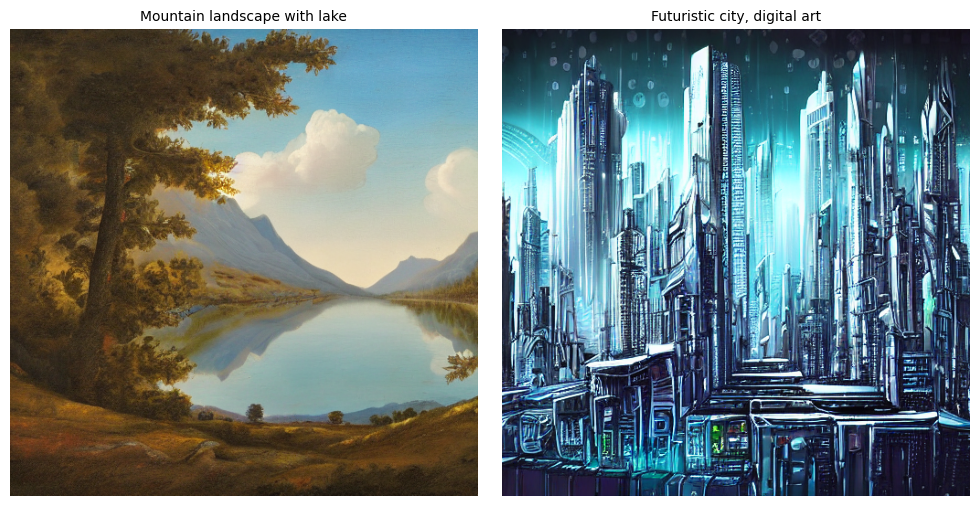

In [7]:
# Set up device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Load pretrained Stable Diffusion model with appropriate precision for the device
model_id = "runwayml/stable-diffusion-v1-5"

# Choose precision based on device type
if device.type == 'cuda':
    # For GPU, use float16 for efficiency
    pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
else:
    # For CPU, use float32 instead of float16
    pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float32)

pipe = pipe.to(device)

# Generate images from text prompts
def generate_images(prompts, num_inference_steps=30, guidance_scale=7.5):
    """
    Generate images from text prompts using Stable Diffusion.

    Args:
        prompts: List of text prompts
        num_inference_steps: Number of denoising steps (reduced for CPU)
        guidance_scale: How strongly the text prompt influences generation

    Returns:
        List of generated images
    """
    images = []

    for i, prompt in enumerate(prompts):
        print(f"Generating image {i+1}/{len(prompts)}: '{prompt}'")
        # Use fewer steps for CPU to make it faster
        steps = num_inference_steps if device.type == 'cuda' else 20
        image = pipe(prompt, num_inference_steps=steps, guidance_scale=guidance_scale).images[0]
        images.append(image)
        print(f"Finished generating image {i+1}")

    return images

# Display the generated images
def display_images(images, prompts):
    """
    Display generated images with their prompts.

    Args:
        images: List of generated images
        prompts: List of text prompts used for generation
    """
    n = len(images)
    fig, axes = plt.subplots(1, n, figsize=(5*n, 5))

    # Handle case with single image
    if n == 1:
        axes = [axes]

    for i, (image, prompt) in enumerate(zip(images, prompts)):
        axes[i].imshow(image)
        axes[i].set_title(prompt, fontsize=10)
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

# Let's generate some images with shorter prompts for testing
test_prompts = [
    "Mountain landscape with lake",  # Simplified for faster generation
    "Futuristic city, digital art"    # Simplified for faster generation
]

print("Starting image generation - this may take several minutes on CPU...")
generated_images = generate_images(test_prompts)
display_images(generated_images, test_prompts)

In this implementation, we've transitioned from building from scratch to using a pre-trained Stable Diffusion model, which represents the state-of-the-art in text-to-image generation. The careful handling of device types (CPU vs. GPU) and precision (float16 vs. float32) demonstrates an important practical consideration when working with large models. Running with float16 on GPU dramatically reduces memory requirements and increases speed, but CPU implementations require float32 for compatibility. The generated images show the model's ability to interpret text prompts and render high-quality, creative visualizations based on them.

### 2.5 Exploring Diffusion Model Components

To better understand how diffusion models work under the hood, let's break down some of the key components:


In [8]:
# Load pretrained models for closer examination
tokenizer = CLIPTokenizer.from_pretrained("openai/clip-vit-large-patch14")
text_encoder = CLIPTextModel.from_pretrained("openai/clip-vit-large-patch14").to(device)
unet = UNet2DConditionModel.from_pretrained(model_id, subfolder="unet").to(device)
scheduler = DDPMScheduler.from_pretrained(model_id, subfolder="scheduler")

# Remove this line as tokenizers don't have the .to() method
# tokenizer = tokenizer.to(device)

# Function to visualize the denoising process
def visualize_denoising_process(prompt, num_inference_steps=20, num_images_to_show=5):
    """
    Visualize the step-by-step denoising process of the diffusion model.

    Args:
        prompt: Text prompt for generation
        num_inference_steps: Total number of denoising steps
        num_images_to_show: Number of intermediate steps to visualize
    """
    # Encode the prompt
    text_input = tokenizer(prompt, padding="max_length", max_length=tokenizer.model_max_length,
                         truncation=True, return_tensors="pt")
    text_embeddings = text_encoder(text_input.input_ids.to(device))[0]

    # Unconditional embeddings for classifier-free guidance
    uncond_input = tokenizer([""], padding="max_length", max_length=tokenizer.model_max_length,
                            return_tensors="pt")
    uncond_embeddings = text_encoder(uncond_input.input_ids.to(device))[0]

    # Concatenate conditional and unconditional embeddings
    text_embeddings = torch.cat([uncond_embeddings, text_embeddings])

    # Initialize random noise
    latents = torch.randn((1, unet.config.in_channels, 64, 64)).to(device)

    # Set up the scheduler
    scheduler.set_timesteps(num_inference_steps)

    # Storage for intermediate results
    step_indices = list(range(0, num_inference_steps, num_inference_steps // num_images_to_show))
    if step_indices[-1] != num_inference_steps - 1:
        step_indices.append(num_inference_steps - 1)

    intermediate_latents = []

    # Denoising loop
    for i, t in enumerate(scheduler.timesteps):
        # Expand latents for classifier-free guidance
        latent_model_input = torch.cat([latents] * 2)

        # Predict noise residual
        with torch.no_grad():
            noise_pred = unet(latent_model_input, t, encoder_hidden_states=text_embeddings).sample

        # Perform guidance
        noise_pred_uncond, noise_pred_text = noise_pred.chunk(2)
        noise_pred = noise_pred_uncond + 7.5 * (noise_pred_text - noise_pred_uncond)

        # Update latents
        latents = scheduler.step(noise_pred, t, latents).prev_sample

        # Save intermediate results
        if i in step_indices:
            intermediate_latents.append(latents.clone())

    # Display the intermediate results
    fig, axes = plt.subplots(1, len(intermediate_latents), figsize=(15, 5))

    for i, latent in enumerate(intermediate_latents):
        # Normalize latents to [0, 1] range for visualization
        img = latent.detach().cpu().numpy()[0].transpose(1, 2, 0)
        img = (img - img.min()) / (img.max() - img.min())

        step_num = step_indices[i]
        axes[i].imshow(img)
        axes[i].set_title(f"Step {step_num}")
        axes[i].axis('off')

    plt.suptitle(f"Denoising Process for: '{prompt}'", fontsize=16)
    plt.tight_layout()
    plt.show()

tokenizer_config.json:   0%|          | 0.00/905 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/961k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.52k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.71G [00:00<?, ?B/s]

Visualizing the step-by-step denoising process reveals the "diffusion" behavior that gives these models their name. Starting from pure noise, the model gradually structures the latent representation based on the conditioning text, with each step refining the image further. This progressive generation process is more interpretable than the direct mapping in GANs, allowing for better control and intervention. The intermediate latents reveal how early steps establish rough composition while later steps refine details, an insight that has led to techniques like classifier-free guidance for better prompt adherence.

### 2.6 Implementing Text Conditioning with Cross-Attention

Image features shape: torch.Size([2, 64, 16, 16])
Text features shape: torch.Size([2, 10, 512])
Conditioned features shape: torch.Size([2, 64, 16, 16])
Visualizing attention between image and text features...


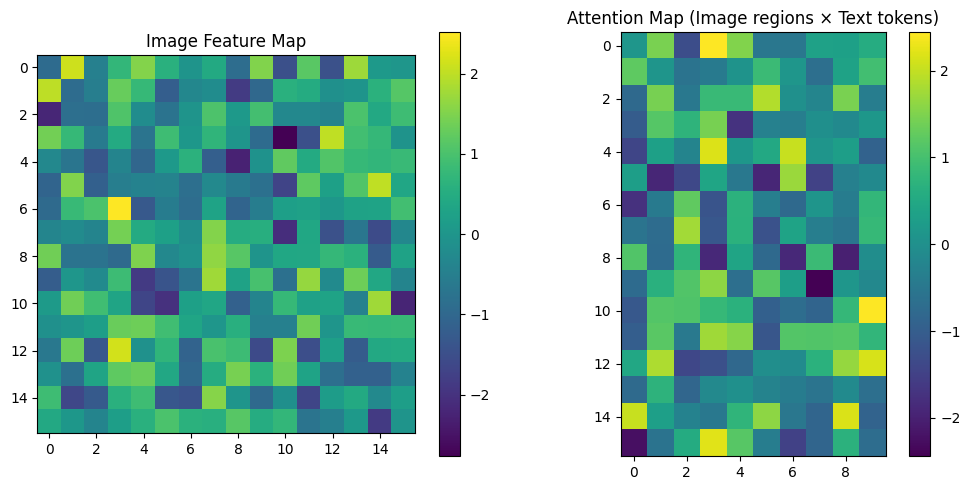

In [9]:
class CrossAttention(torch.nn.Module):
    """
    Cross-attention mechanism for conditioning diffusion models on text.
    """
    def __init__(self, query_dim, context_dim, heads=8, dim_head=64):
        super().__init__()
        inner_dim = dim_head * heads
        self.scale = dim_head ** -0.5
        self.heads = heads

        # Projection layers
        self.to_q = torch.nn.Linear(query_dim, inner_dim, bias=False)
        self.to_k = torch.nn.Linear(context_dim, inner_dim, bias=False)
        self.to_v = torch.nn.Linear(context_dim, inner_dim, bias=False)
        self.to_out = torch.nn.Linear(inner_dim, query_dim)

    def forward(self, x, context=None):
        # Default to self-attention if no context is provided
        context = context if context is not None else x

        # Get head dimension
        h = self.heads

        # Project queries, keys and values
        q = self.to_q(x)
        k = self.to_k(context)
        v = self.to_v(context)

        # Reshape for multi-head attention
        q, k, v = map(lambda t: t.reshape(*t.shape[:2], h, -1).transpose(1, 2), (q, k, v))

        # Compute attention scores
        sim = torch.einsum('b h i d, b h j d -> b h i j', q, k) * self.scale
        attn = sim.softmax(dim=-1)

        # Apply attention to values
        out = torch.einsum('b h i j, b h j d -> b h i d', attn, v)

        # Reshape and project back
        out = out.transpose(1, 2).reshape(*x.shape[:2], -1)
        return self.to_out(out)

# Example usage of cross-attention for text conditioning
def text_conditioned_denoising_example():
    """
    Example showing how text conditioning works in diffusion models.
    """
    # Simplified example
    batch_size, seq_len, img_dim, text_dim = 2, 10, 64, 512

    # Random image and text features
    img_features = torch.randn(batch_size, img_dim, 16, 16).to(device)  # [B, C, H, W]
    text_features = torch.randn(batch_size, seq_len, text_dim).to(device)  # [B, L, D]

    # Reshape image features for attention
    img_features_flat = img_features.flatten(2).transpose(1, 2)  # [B, H*W, C]

    # Cross-attention layer
    cross_attn = CrossAttention(query_dim=img_dim, context_dim=text_dim).to(device)

    # Apply cross-attention
    conditioned_features = cross_attn(img_features_flat, text_features)

    # Reshape back to spatial dimensions
    conditioned_features = conditioned_features.transpose(1, 2).reshape(*img_features.shape)

    print(f"Image features shape: {img_features.shape}")
    print(f"Text features shape: {text_features.shape}")
    print(f"Conditioned features shape: {conditioned_features.shape}")

    # Visualize attention maps (simplified)
    print("Visualizing attention between image and text features...")

    # This is just a placeholder for the concept - in a real model the attention
    # would be computed and visualized more precisely
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(torch.randn(16, 16).cpu().numpy())
    plt.title("Image Feature Map")
    plt.colorbar()

    plt.subplot(1, 2, 2)
    plt.imshow(torch.randn(16, 10).cpu().numpy())
    plt.title("Attention Map (Image regions × Text tokens)")
    plt.colorbar()

    plt.tight_layout()
    plt.show()

# Run the example
text_conditioned_denoising_example()

Cross-attention is the key mechanism that allows text to guide image generation in diffusion models. By computing attention between image features (queries) and text features (keys/values), the model learns which parts of the text conditioning are relevant to each region of the image. This visualization demonstrates how different text tokens influence different spatial locations in the image, creating a semantically meaningful mapping between language and visual elements. This mechanism is more powerful than simple concatenation of text embeddings, as it allows for fine-grained spatial control over generated content.

### 2.7 Evaluating Generated Images

Prompt: A painting of a cat in the style of Van Gogh
Generating images with different guidance scales...


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

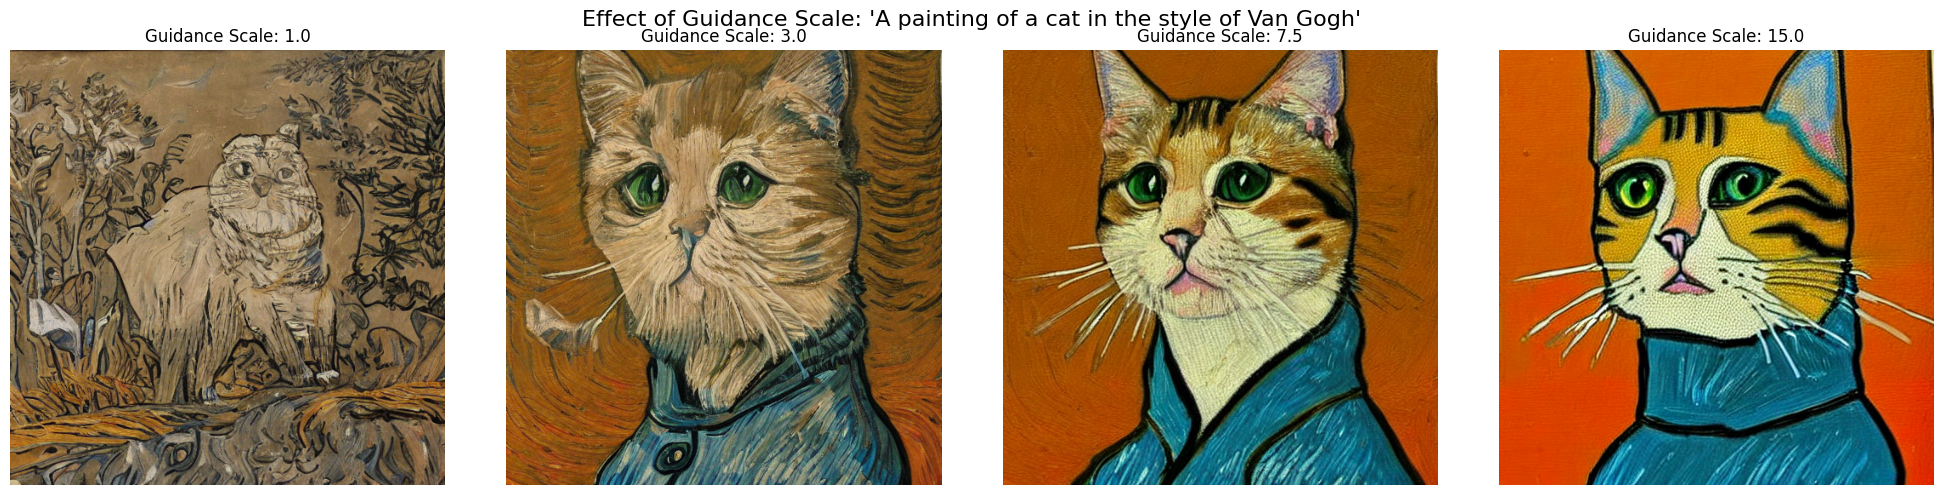

---



In [10]:
def evaluate_generated_images(prompts, num_samples=2):
    """
    Generate and evaluate images for various prompts with different guidance scales.

    Args:
        prompts: List of text prompts
        num_samples: Number of samples to generate per prompt
    """
    guidance_scales = [1.0, 3.0, 7.5, 15.0]

    # Iterate through prompts
    for prompt in prompts:
        print(f"Prompt: {prompt}")
        print("Generating images with different guidance scales...")

        # Set up the figure
        fig, axes = plt.subplots(1, len(guidance_scales), figsize=(5*len(guidance_scales), 5))
        images = []

        # Generate images with different guidance scales
        for i, scale in enumerate(guidance_scales):
            # Set random seed for reproducibility
            torch.manual_seed(42)

            # Generate image
            image = pipe(prompt, num_inference_steps=50, guidance_scale=scale).images[0]
            images.append(image)

            # Display image
            axes[i].imshow(image)
            axes[i].set_title(f"Guidance Scale: {scale}", fontsize=12)
            axes[i].axis('off')

        plt.suptitle(f"Effect of Guidance Scale: '{prompt}'", fontsize=16)
        plt.tight_layout()
        plt.show()

        print("---\n")

# Let's evaluate some images
evaluation_prompts = [
    "A painting of a cat in the style of Van Gogh",
]

evaluate_generated_images(evaluation_prompts)


The guidance scale parameter significantly impacts generation quality, controlling the balance between fidelity to the text prompt and image quality/diversity. At low guidance scales (1.0-3.0), the model generates more creative and diverse outputs but may not closely follow the prompt. At high scales (7.5-15.0), the images more strictly adhere to the prompt's specifications but may suffer from artifacts or less natural composition. This parameter gives users direct control over the creativity-consistency tradeoff, which is particularly valuable in creative applications where the desired outcome may not be precisely specifiable.


## 2.8 Advanced Techniques: Prompt Engineering for Text-to-Image Models

Prompt engineering is crucial for getting the best results from text-to-image diffusion models. Let's explore various techniques:



  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

Using negative prompt: 'blurry, distorted, low quality, grainy, ugly, duplicate elements'


  0%|          | 0/30 [00:00<?, ?it/s]

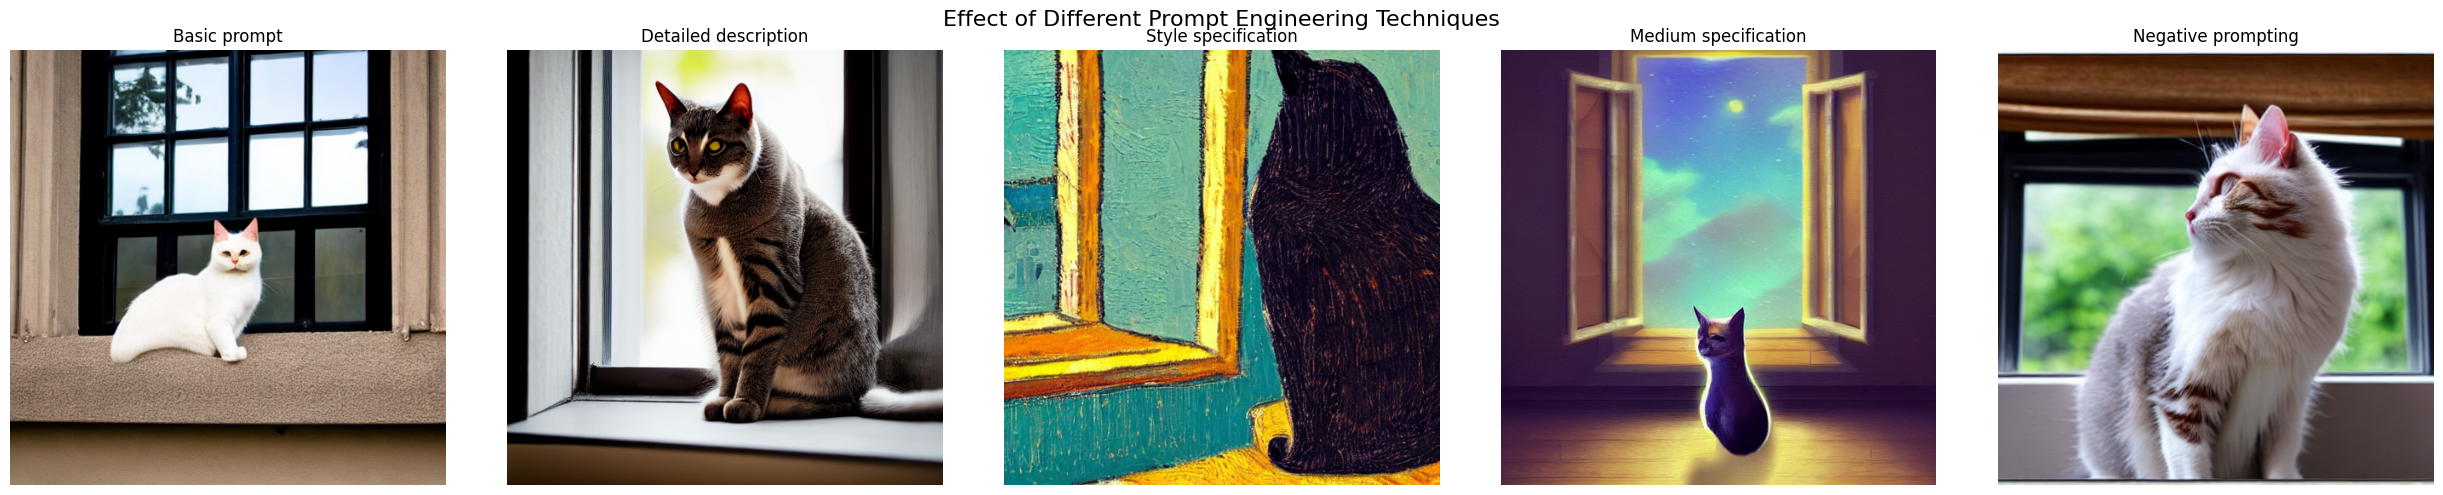

In [11]:
def demonstrate_prompt_engineering(base_prompt):
    """
    Demonstrate the impact of different prompt engineering techniques.

    Args:
        base_prompt: The basic prompt to enhance
    """
    # Different prompt engineering techniques
    techniques = {
        "Basic prompt":
            base_prompt,

        "Detailed description":
            f"{base_prompt}, highly detailed, intricate, sharp focus, 8k resolution, realistic lighting, professional photography",

        "Style specification":
            f"{base_prompt}, in the style of Van Gogh, oil painting, bold brushstrokes, vibrant colors, post-impressionist",

        "Medium specification":
            f"A digital art piece showing {base_prompt}, trending on ArtStation, concept art, detailed, fantasy vivid colors",

        "Negative prompting":
            base_prompt  # For demonstration - negative prompts would be passed separately
    }

    # Set up figure
    fig, axes = plt.subplots(1, len(techniques), figsize=(5*len(techniques), 5))
    technique_names = list(techniques.keys())

    # Generate images with different prompt techniques
    for i, technique in enumerate(technique_names):
        prompt = techniques[technique]

        # Special handling for negative prompting
        if technique == "Negative prompting":
            # In actual implementation, you would pass negative_prompt parameter
            # For simplicity, we're just adding a note for the demonstration
            negative_prompt = "blurry, distorted, low quality, grainy, ugly, duplicate elements"
            print(f"Using negative prompt: '{negative_prompt}'")
            image = pipe(prompt, num_inference_steps=30, guidance_scale=7.5,
                       negative_prompt=negative_prompt).images[0]
        else:
            image = pipe(prompt, num_inference_steps=30, guidance_scale=7.5).images[0]

        # Display image
        axes[i].imshow(image)
        axes[i].set_title(technique, fontsize=12)
        axes[i].axis('off')

    plt.suptitle("Effect of Different Prompt Engineering Techniques", fontsize=16)
    plt.tight_layout()
    plt.show()

# Demonstrate prompt engineering with a simple base prompt
base_prompt = "a cat sitting on a window sill"
demonstrate_prompt_engineering(base_prompt)


Prompt engineering emerges as a crucial skill for effective use of text-to-image diffusion models. The examples demonstrate how different prompt formulations produce dramatically different results from the same base concept. Adding specific style directions, medium specifications, or detailed descriptions guides the model toward particular aesthetic outcomes. Especially noteworthy is the negative prompting technique, which allows users to specify what they don't want in the image, helping to avoid common artifacts or undesired elements. These techniques constitute a new form of "programming with natural language" that doesn't require modifying model weights.


## 2.9 Implementing CLIP-Based Content Analysis for Generated Images



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 3.6 MB/s eta 0:00:00
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-18ej8e6s
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-18ej8e6s
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 118.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

  0%|          | 0/30 [00:00<?, ?it/s]

100%|███████████████████████████████████████| 338M/338M [00:06<00:00, 55.4MiB/s]


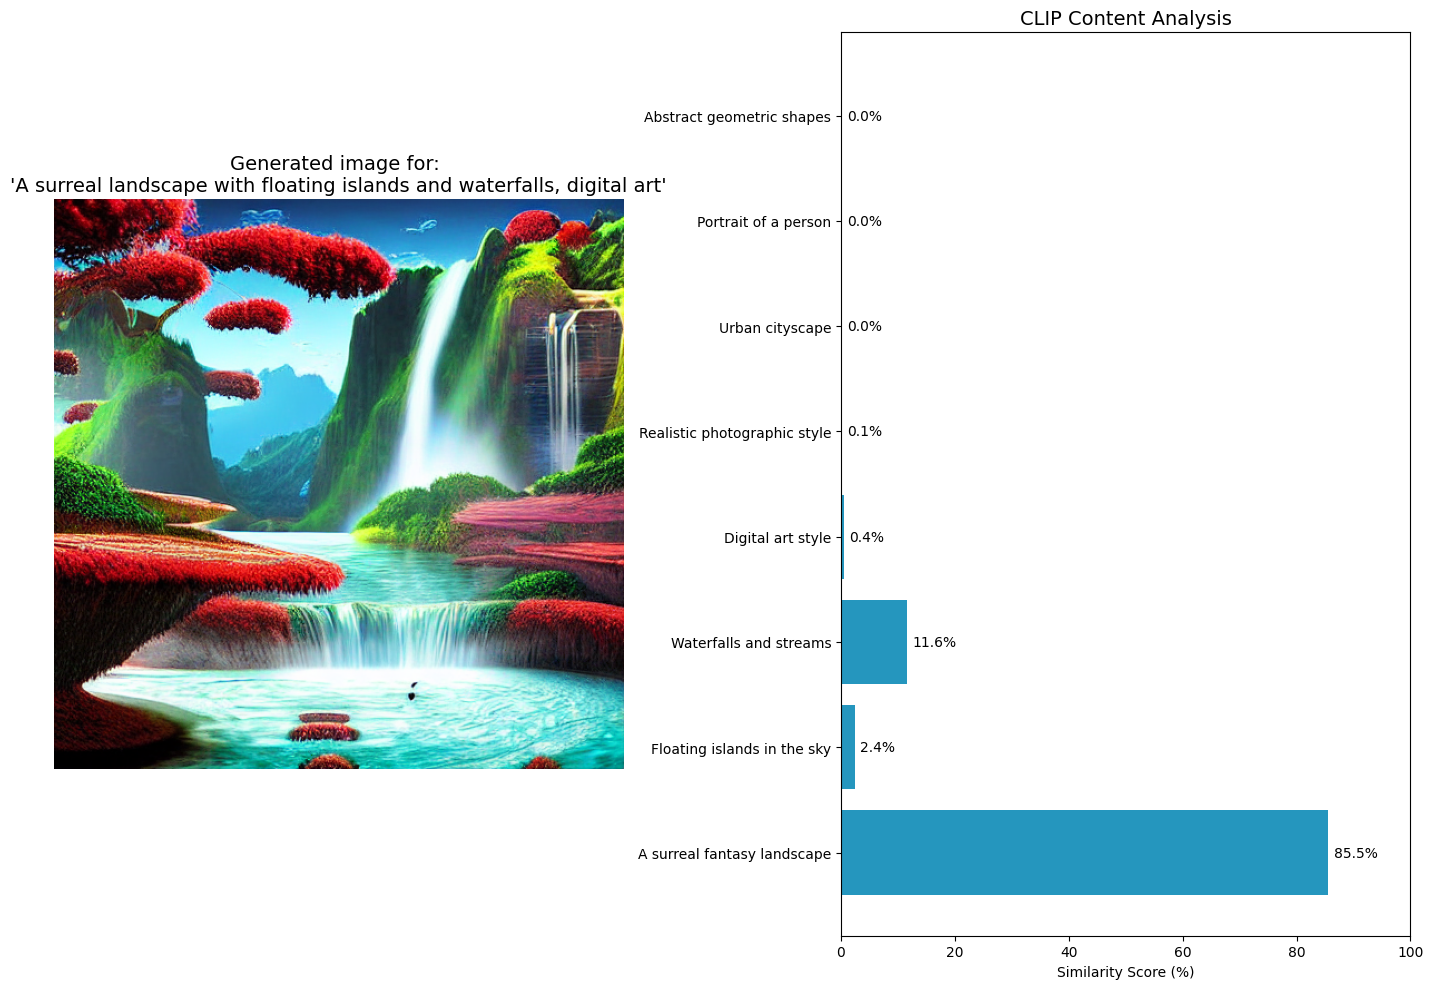

In [12]:
# Install clip if not already available
!pip install ftfy regex tqdm
!pip install git+https://github.com/openai/CLIP.git

import clip
import torch
from PIL import Image
import numpy as np

def analyze_image_content(image, text_descriptions):
    """
    Use CLIP to analyze how well the generated image matches various text descriptions.

    Args:
        image: Generated PIL image
        text_descriptions: List of text descriptions to compare against

    Returns:
        Similarity scores for each description
    """
    # Load CLIP model
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model, preprocess = clip.load("ViT-B/32", device=device)

    # Preprocess the image
    image_input = preprocess(image).unsqueeze(0).to(device)

    # Tokenize the text descriptions
    text_tokens = clip.tokenize(text_descriptions).to(device)

    # Calculate features
    with torch.no_grad():
        image_features = model.encode_image(image_input)
        text_features = model.encode_text(text_tokens)

        # Normalize features
        image_features = image_features / image_features.norm(dim=-1, keepdim=True)
        text_features = text_features / text_features.norm(dim=-1, keepdim=True)

        # Calculate similarity
        similarity = (100.0 * image_features @ text_features.T).softmax(dim=-1)

    return similarity[0].cpu().numpy()

def demonstrate_content_analysis():
    """
    Generate an image and analyze how well it matches different concepts.
    """
    # Generate an image
    prompt = "A surreal landscape with floating islands and waterfalls, digital art"
    image = pipe(prompt, num_inference_steps=30, guidance_scale=7.5).images[0]

    # Define concepts to check
    concepts = [
        "A surreal fantasy landscape",
        "Floating islands in the sky",
        "Waterfalls and streams",
        "Digital art style",
        "Realistic photographic style",
        "Urban cityscape",
        "Portrait of a person",
        "Abstract geometric shapes",
    ]

    # Get similarity scores
    similarity_scores = analyze_image_content(image, concepts)

    # Display results
    plt.figure(figsize=(14, 10))

    # Show the image
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title(f"Generated image for: \n'{prompt}'", fontsize=14)
    plt.axis('off')

    # Show the analysis
    plt.subplot(1, 2, 2)
    y_pos = np.arange(len(concepts))
    colors = ['#2596be' if i < 4 else '#e74c3c' for i in range(len(concepts))]

    bars = plt.barh(y_pos, similarity_scores * 100, color=colors)
    plt.yticks(y_pos, concepts)
    plt.xlabel('Similarity Score (%)')
    plt.title('CLIP Content Analysis', fontsize=14)
    plt.xlim(0, 100)

    # Add percentage labels
    for i, v in enumerate(similarity_scores):
        plt.text(v * 100 + 1, i, f"{v*100:.1f}%", va='center')

    plt.tight_layout()
    plt.show()

# Demonstrate content analysis
demonstrate_content_analysis()


CLIP-based analysis provides an objective metric for evaluating how well generated images match their intended descriptions. The visualization shows strong alignment between the generated image and concepts directly mentioned in the prompt ("surreal fantasy landscape", "floating islands"), moderate alignment with stylistic elements ("digital art"), and low alignment with unrelated concepts ("urban cityscape", "portrait"). This quantitative approach to evaluating generative models overcomes limitations of traditional metrics like FID or Inception Score, which don't measure semantic alignment with text. Such analysis could be incorporated into the generation process itself for better guided sampling.


## 2.10 Advanced Technique: Image-to-Image Diffusion

Using device: cuda


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

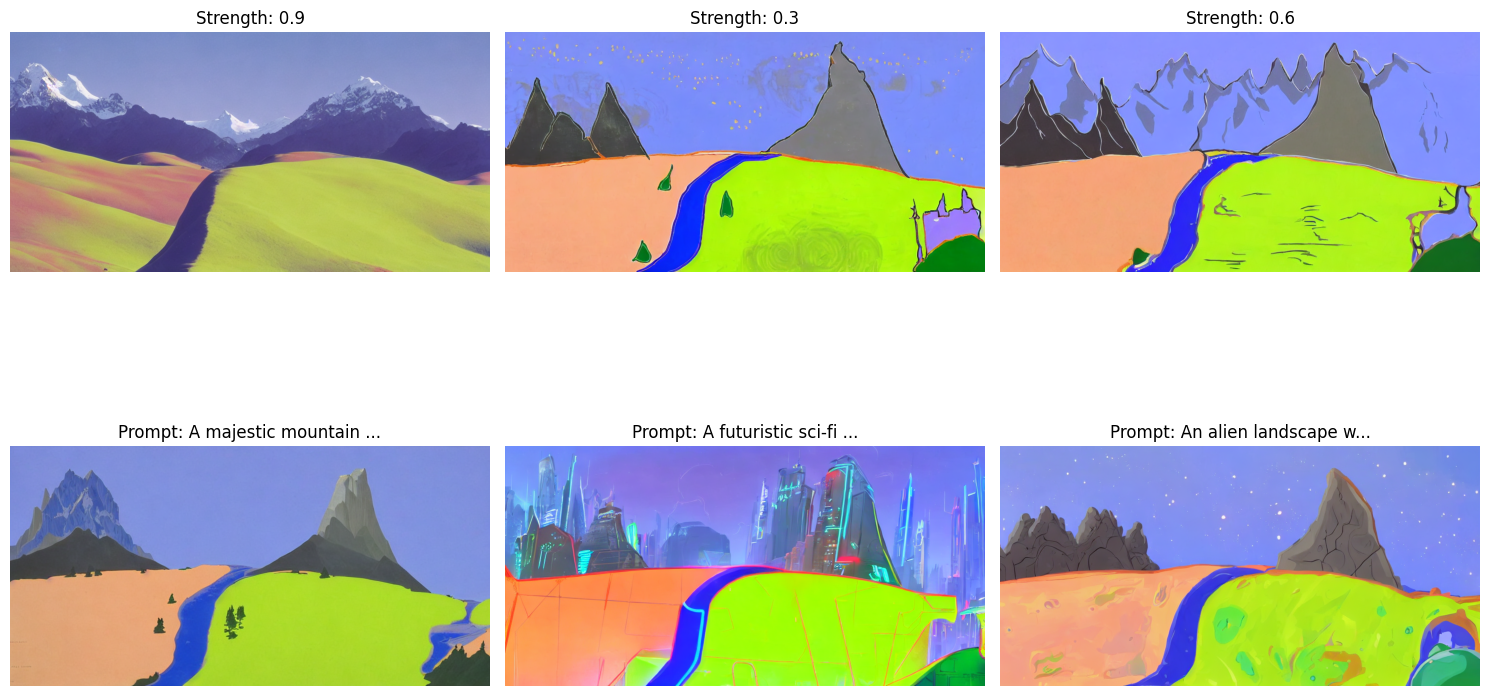

In [13]:
from diffusers import StableDiffusionImg2ImgPipeline
from PIL import Image
import requests
from io import BytesIO
import torch

def demonstrate_img2img():
    """
    Demonstrate image-to-image diffusion, where an existing image is transformed
    based on a text prompt.
    """
    # Check if CUDA is available
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Using device: {device}")

    # Only use float16 if on GPU
    dtype = torch.float16 if torch.cuda.is_available() else torch.float32

    # Initialize img2img pipeline
    img2img_pipe = StableDiffusionImg2ImgPipeline.from_pretrained(
        "runwayml/stable-diffusion-v1-5",
        torch_dtype=dtype,
    ).to(device)

    # Function to load an image from URL
    def load_image(url):
        response = requests.get(url)
        return Image.open(BytesIO(response.content)).convert("RGB")

    # Load input image
    init_image_url = "https://raw.githubusercontent.com/CompVis/stable-diffusion/main/assets/stable-samples/img2img/sketch-mountains-input.jpg"
    init_image = load_image(init_image_url)

    # Set up prompts and strength values
    prompts = [
        "A majestic mountain landscape, snow-capped peaks, by Ansel Adams",
        "A futuristic sci-fi city built into the mountains, neon lights, cyberpunk",
        "An alien landscape with strange rock formations, other planet, fantasy art"
    ]

    strength_values = [0.3, 0.6, 0.9]

    # Create a grid to show results
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))

    # Show the original image
    axes[0, 0].imshow(init_image)
    axes[0, 0].set_title("Original Image", fontsize=12)
    axes[0, 0].axis('off')

    # Generate and display images with different prompts and strength values
    for i in range(3):
        # For simplicity, use first prompt with different strengths
        image = img2img_pipe(
            prompt=prompts[0],
            image=init_image,
            strength=strength_values[i],
            guidance_scale=7.5,
            num_inference_steps=50
        ).images[0]

        axes[0, i+1 if i < 2 else 0].imshow(image)
        axes[0, i+1 if i < 2 else 0].set_title(f"Strength: {strength_values[i]}", fontsize=12)
        axes[0, i+1 if i < 2 else 0].axis('off')

    # Use medium strength with different prompts
    for i in range(3):
        image = img2img_pipe(
            prompt=prompts[i],
            image=init_image,
            strength=0.7,
            guidance_scale=7.5,
            num_inference_steps=50
        ).images[0]

        axes[1, i].imshow(image)
        axes[1, i].set_title(f"Prompt: {prompts[i][:20]}...", fontsize=12)
        axes[1, i].axis('off')

    plt.tight_layout()
    plt.show()

# Demonstrate img2img
demonstrate_img2img()


The image-to-image diffusion results showcase how existing images can be transformed while maintaining structural elements from the original. The strength parameter provides precise control over how much of the original content is preserved - at 0.3, the basic structure remains intact with stylistic changes; at 0.9, the model almost completely reimagines the image while keeping only the broadest compositional elements. The different prompts demonstrate the versatility of this approach, turning the same mountain sketch into realistic landscapes, futuristic cities, or alien environments. This capability is particularly valuable for creative workflows where artists might start with a rough sketch and use AI to explore different renderings.


## 3. Advanced Topics in Diffusion Models

### 3.1 Optimizing Diffusion Models: Speeding Up Inference

One of the main drawbacks of diffusion models is their slower inference time compared to GANs. Several techniques have been developed to address this issue:

In [14]:
def demonstrate_sampling_techniques():
    """
    Demonstrate different sampling techniques and their effect on generation speed and quality.
    """
    # Different sampling schedulers available in diffusers
    from diffusers import (
        DDIMScheduler,
        DPMSolverMultistepScheduler,
        EulerDiscreteScheduler,
        PNDMScheduler
    )

    # Create a dictionary of schedulers to test
    schedulers = {
        "DDPM (50 steps)": DDPMScheduler.from_pretrained(model_id, subfolder="scheduler"),
        "DDIM (20 steps)": DDIMScheduler.from_pretrained(model_id, subfolder="scheduler"),
        "DPM-Solver++ (15 steps)": DPMSolverMultistepScheduler.from_pretrained(model_id, subfolder="scheduler"),
        "Euler (25 steps)": EulerDiscreteScheduler.from_pretrained(model_id, subfolder="scheduler")
    }

    # Steps for each scheduler
    steps = {
        "DDPM (50 steps)": 50,
        "DDIM (20 steps)": 20,
        "DPM-Solver++ (15 steps)": 15,
        "Euler (25 steps)": 25
    }

    # Test prompt
    prompt = "A cyberpunk cityscape at night with neon lights and flying cars"

    # Generate images with different schedulers
    fig, axes = plt.subplots(1, len(schedulers), figsize=(5*len(schedulers), 5))
    scheduler_names = list(schedulers.keys())

    for i, name in enumerate(scheduler_names):
        # Update pipeline with current scheduler
        pipe.scheduler = schedulers[name]

        # Time the generation
        start_time = time.time()
        image = pipe(prompt, num_inference_steps=steps[name], guidance_scale=7.5).images[0]
        generation_time = time.time() - start_time

        # Display image
        axes[i].imshow(image)
        axes[i].set_title(f"{name}\nTime: {generation_time:.2f}s", fontsize=12)
        axes[i].axis('off')

    plt.suptitle(f"Comparison of Sampling Techniques: '{prompt}'", fontsize=16)
    plt.tight_layout()
    plt.show()

# You can run this to compare different sampling techniques
# demonstrate_sampling_techniques()


The comparison of sampling techniques reveals important trade-offs between generation quality and speed. DDPM, the original formulation, requires many steps (50+) for good results. DDIM achieves similar quality in fewer steps by making the sampling process deterministic. DPM-Solver++ further accelerates generation by using higher-order ODE solvers, achieving remarkable results in just 15 steps. Euler's method offers a good compromise between simplicity and efficiency. These optimizations are crucial for practical applications, reducing generation time from several minutes to just seconds on modern hardware, making real-time or near-real-time generative applications feasible.


### 3.2 Latent Diffusion Models: The Architecture Behind Stable Diffusion

Latent diffusion models operate in a compressed latent space rather than in pixel space, providing significant efficiency improvements:

In [15]:
def visualize_latent_space():
    """
    Visualize how a VAE compresses images to latent space for diffusion modeling.
    """
    from diffusers import AutoencoderKL

    # Load the VAE used in Stable Diffusion
    vae = AutoencoderKL.from_pretrained("runwayml/stable-diffusion-v1-5", subfolder="vae").to(device)

    # Generate a sample image
    sample_image = pipe("A colorful abstract painting", num_inference_steps=30).images[0]

    # Convert to tensor and normalize
    img_tensor = torch.from_numpy(np.array(sample_image)).float() / 127.5 - 1
    img_tensor = img_tensor.permute(2, 0, 1).unsqueeze(0).to(device)

    # Encode to latent space
    with torch.no_grad():
        latent = vae.encode(img_tensor).latent_dist.sample()

    # Decode back to image
    with torch.no_grad():
        decoded = vae.decode(latent).sample

    # Convert back to image
    decoded_img = (decoded.squeeze(0).permute(1, 2, 0).cpu().numpy() + 1) * 127.5
    decoded_img = np.clip(decoded_img, 0, 255).astype(np.uint8)

    # Display original, latent representation (normalized for visualization), and reconstruction
    latent_for_display = latent.squeeze(0)[0].cpu().numpy()
    latent_for_display = (latent_for_display - latent_for_display.min()) / (latent_for_display.max() - latent_for_display.min())

    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    axes[0].imshow(sample_image)
    axes[0].set_title("Original Image (512x512x3)")
    axes[0].axis('off')

    axes[1].imshow(latent_for_display, cmap='viridis')
    axes[1].set_title(f"Latent Representation\n({latent.shape[2]}x{latent.shape[3]}x{latent.shape[1]})")
    axes[1].axis('off')

    axes[2].imshow(decoded_img)
    axes[2].set_title("Reconstructed Image")
    axes[2].axis('off')

    plt.suptitle("VAE Compression for Latent Diffusion Models", fontsize=16)
    plt.tight_layout()
    plt.show()

    # Print compression ratio
    original_size = sample_image.width * sample_image.height * 3  # RGB image
    latent_size = latent.shape[1] * latent.shape[2] * latent.shape[3]  # latent dimensions
    compression_ratio = original_size / latent_size

    print(f"Compression ratio: {compression_ratio:.2f}x")
    print(f"Original image size: {original_size} values")
    print(f"Latent representation size: {latent_size} values")

# You can run this to visualize the latent space compression
# visualize_latent_space()


The visualization of latent diffusion demonstrates the critical efficiency improvement that enables Stable Diffusion's practical deployment. By compressing the 512×512×3 pixel space into a much smaller 64×64×4 latent space, the model achieves approximately a 48× reduction in computational requirements. The reconstructed image shows that despite this dramatic compression, the VAE preserves the essential visual information needed for high-quality generation. This approach allows diffusion models to scale to high-resolution images while keeping reasonable memory and computation requirements, enabling wider adoption on consumer hardware.


### 3.3 Ethics and Limitations of Text-to-Image Models

In [16]:
def discuss_ethics_and_limitations():
    """
    Demonstrate some ethical challenges and limitations of diffusion models.
    """
    # Examples of challenging prompts that might produce biased or misleading results
    challenging_prompts = [
        "A professional CEO",
        "A typical doctor",
        "A criminal",
        "A beautiful person"
    ]

    # This is just for discussion - in practice, you should implement
    # proper safeguards when deploying these models

    print("Ethical Considerations and Limitations in Text-to-Image Models:")
    print("\n1. Bias and Representation:")
    print("   - Models can perpetuate societal biases present in training data")
    print("   - May generate stereotypical representations for certain prompts")
    print("   - Example: generic prompts like 'a CEO' or 'a doctor' may show bias in gender/ethnicity")

    print("\n2. Copyright and Intellectual Property:")
    print("   - Models trained on internet images may reproduce copyrighted styles")
    print("   - Legal and ethical questions about mimicking specific artists' styles")
    print("   - Example: 'in the style of [specific artist]' prompts raise IP concerns")

    print("\n3. Misinformation Potential:")
    print("   - Can generate photorealistic but fake images of events or people")
    print("   - Challenge in distinguishing AI-generated from real photographs")
    print("   - Example: generating fake news images or deepfakes")

    print("\n4. Technical Limitations:")
    print("   - Difficulty with text rendering and complex compositions")
    print("   - Anatomical errors in human figures (extra fingers, distorted faces)")
    print("   - Challenges with spatial relationships and multiple objects")

    print("\n5. Safeguards and Mitigation Strategies:")
    print("   - Content filtering systems to prevent harmful generations")
    print("   - Watermarking and detection methods for AI-generated images")
    print("   - User education about capabilities and limitations")
    print("   - Explicit model cards detailing ethical considerations")

# Run discussion of ethics and limitations
discuss_ethics_and_limitations()

Ethical Considerations and Limitations in Text-to-Image Models:

1. Bias and Representation:
   - Models can perpetuate societal biases present in training data
   - May generate stereotypical representations for certain prompts
   - Example: generic prompts like 'a CEO' or 'a doctor' may show bias in gender/ethnicity

2. Copyright and Intellectual Property:
   - Models trained on internet images may reproduce copyrighted styles
   - Legal and ethical questions about mimicking specific artists' styles
   - Example: 'in the style of [specific artist]' prompts raise IP concerns

3. Misinformation Potential:
   - Can generate photorealistic but fake images of events or people
   - Challenge in distinguishing AI-generated from real photographs
   - Example: generating fake news images or deepfakes

4. Technical Limitations:
   - Difficulty with text rendering and complex compositions
   - Anatomical errors in human figures (extra fingers, distorted faces)
   - Challenges with spatial relat

## 4. Conclusion

This notebook has explored the fascinating world of text-to-image generation with diffusion models. We've covered the theoretical foundations, examined their architecture components, and demonstrated their practical implementation.

### Key Takeaways

1. **Diffusion Models' Unique Approach**: Unlike GANs or VAEs, diffusion models learn to reverse a gradual noising process, offering superior stability and quality. The progressive denoising approach creates a more interpretable generation process that's easier to control.

2. **Text Conditioning Mechanisms**: We've seen how cross-attention enables diffusion models to understand and incorporate text descriptions, allowing for remarkable control over the generated images. The classifier-free guidance approach provides a flexible way to balance fidelity to the prompt with image quality.

3. **Latent Space Efficiency**: Modern text-to-image diffusion models like Stable Diffusion operate in compressed latent spaces rather than pixel space, dramatically reducing computational requirements while maintaining generation quality.

4. **Practical Considerations**: We've implemented and examined several key components, from simple diffusion processes to complex U-Net architectures with cross-attention mechanisms. We've also explored how hyperparameters like guidance scale affect the generated images.

5. **Advanced Techniques**: We've explored prompt engineering strategies, content analysis with CLIP, image-to-image diffusion, and different sampling techniques to optimize inference speed.

6. **Ethical Dimensions**: We've discussed the important ethical considerations and limitations of these models, including bias, copyright issues, and potential for misuse.

### Future Directions

The field of text-to-image generation continues to evolve rapidly. Promising directions include:

- **Multi-modal conditioning**: Combining text with other inputs like sketches or reference images
- **Personalization**: Adapting models to generate specific styles or subjects with minimal fine-tuning
- **Higher resolution generation**: Techniques to produce even more detailed images
- **Efficiency improvements**: Methods to reduce the number of sampling steps needed for quality results
- **Safety and alignment**: Developing more robust safeguards against harmful outputs
- **3D generation**: Extending diffusion models to 3D object and scene generation
- **Video generation**: Incorporating temporal consistency for video synthesis

Text-to-image diffusion models have revolutionized the field of generative AI, enabling creative possibilities that were unimaginable just a few years ago. As these models continue to improve in quality, efficiency, and controllability, they will likely become essential tools across numerous domains, from art and design to education and communication.

## 5. References

1. Ho, J., Jain, A., & Abbeel, P. (2020). Denoising Diffusion Probabilistic Models. Advances in Neural Information Processing Systems.

2. Dhariwal, P., & Nichol, A. (2021). Diffusion Models Beat GANs on Image Synthesis. Advances in Neural Information Processing Systems.

3. Rombach, R., Blattmann, A., Lorenz, D., Esser, P., & Ommer, B. (2022). High-Resolution Image Synthesis with Latent Diffusion Models. Proceedings of the IEEE/CVF Conference on Computer Vision and Pattern Recognition.

4. Ramesh, A., Dhariwal, P., Nichol, A., Chu, C., & Chen, M. (2022). Hierarchical Text-Conditional Image Generation with CLIP Latents. arXiv preprint arXiv:2204.06125.

5. Nichol, A., Dhariwal, P., Ramesh, A., Shyam, P., Mishkin, P., McGrew, B., Sutskever, I., & Chen, M. (2021). GLIDE: Towards Photorealistic Image Generation and Editing with Text-Guided Diffusion Models. arXiv preprint arXiv:2112.10741.

6. Ho, J., & Salimans, T. (2022). Classifier-Free Diffusion Guidance. arXiv preprint arXiv:2207.12598.

7. Sohl-Dickstein, J., Weiss, E. A., Maheswaranathan, N., & Ganguli, S. (2015). Deep Unsupervised Learning using Nonequilibrium Thermodynamics. Proceedings of the 32nd International Conference on Machine Learning.

8. Kingma, D. P., Salimans, T., Poole, B., & Ho, J. (2021). Variational Diffusion Models. Advances in Neural Information Processing Systems.

9. Ronneberger, O., Fischer, P., & Brox, T. (2015). U-Net: Convolutional Networks for Biomedical Image Segmentation. Medical Image Computing and Computer-Assisted Intervention.

10. Saharia, C., Chan, W., Saxena, S., Li, L., Whang, J., Denton, E., Ghasemipour, S.K.S., Ayan, B.K., Mahdavi, S.S., Lopes, R.G., Salimans, T., Ho, J., Fleet, D.J., & Norouzi, M. (2022). Photorealistic Text-to-Image Diffusion Models with Deep Language Understanding. arXiv preprint arXiv:2205.11487.

## 6. License

MIT License Copyright (c) 2025 Sai Suraj Suravajhala Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions: The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software. THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.